## Objective

After completing this learners will:
- Understand why EDA is the most critical ML Phase
- Apply theory-backed EDA techniques
- Perform stakeholder-ready data storytelling
- Detect non-linearity, bias, and leakage
- Produce interviwe-and production- grade EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)
pd.set_option("display.max_columns",None)
df = pd.read_csv("cars24-car-price-cleaned-new.csv")
df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [3]:
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [4]:
np.random.seed(787)
np.random.rand(5)

array([0.60559405, 0.68185301, 0.96401299, 0.0970847 , 0.8028006 ])

In [5]:
def get_fuel_type(row):
    if row['Petrol'] == 1:
        return 'Petrol'
    elif row['Diesel'] == 1:
        return 'Diesel'
    elif row['LPG'] == 1:
        return 'LPG'
    elif row['Electric'] == 1:
        return 'Electric'
    else:
        return 'Other'

In [6]:
df['fuel_type'] = df.apply(get_fuel_type, axis=1)

In [7]:
df

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5,fuel_type
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0,Petrol
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0,Petrol
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0,Petrol
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0,Petrol
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,69480,23.59,1364.0,67.05,6.0,TOYOTA,PLATINUM ETIOS 1.4 GXD,0,0,1,0,0,0,1,1,0,Diesel
19816,9.25,18000,17.50,1373.0,91.10,4.0,MARUTI,ERTIGA BSIV VXI,0,0,0,0,0,1,1,0,1,Petrol
19817,4.25,67000,21.14,1498.0,103.52,8.0,SKODA,RAPID 1.5 TDI ELEGANCE,0,0,1,0,0,0,1,1,0,Diesel
19818,12.25,3800000,16.00,2179.0,140.00,7.0,MAHINDRA,XUV500 W6 2WD,0,0,1,0,0,0,1,0,1,Diesel


In [8]:
df['transmission'] = df['Manual'].apply(lambda x: 'Manual' if x == 1 else 'Automatic')

In [9]:
cities = ["Delhi", "Mumbai", "Bangalore", "Chennai", "Kolkata", "Hyderabad", "Pune", "Ahemdabad"]
df['city'] = np.random.choice(cities, size=len(df))

df.head()

,selling_price,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5,fuel_type,transmission,city
0,1.20,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0,Petrol,Manual,Kolkata
1,5.50,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0,Petrol,Manual,Chennai
2,2.15,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0,Petrol,Manual,Ahemdabad
3,2.26,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0,Petrol,Manual,Hyderabad
4,5.70,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0,Diesel,Manual,Mumbai


In [10]:
import plotly.express as px

px.histogram(df, x='selling_price', nbins=60, title="Target Distribution").show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [13]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16652.000000,16381.000000,16652.000000,16652.000000,16652.000000,16652.000000,16652.000000
mean,8283.409620,2006.390513,2.752314,1.996875,2.499677,1.151829,8.457873
std,4794.471477,5.863261,1.327002,1.322972,1.164023,1.054813,3.717756
min,1.000000,1980.000000,0.140000,0.010000,0.000000,-0.474276,0.240000
25%,4129.750000,2003.000000,1.781124,1.087977,1.781124,0.394830,5.580341
50%,8273.500000,2007.000000,2.697415,1.714664,2.480356,0.491870,7.536614
75%,12436.250000,2010.000000,3.677290,2.795123,3.176299,1.781124,11.227334
max,16600.000000,2020.000000,8.725452,8.367985,12.722984,7.358020,30.555862


In [17]:
# Find the longest running game first

game_life = data.groupby('Name').agg(min_year = ('Year','min'),max_year = ('Year','max'))
game_life['range'] = game_life['max_year'] - game_life['min_year']
game_life.sort_values(['range'],ascending=False) [:5]
game_life


,min_year,max_year,range
Name,,,
.hack//G.U. Vol.1//Rebirth,2006.0,2006.0,0.0
.hack//G.U. Vol.2//Reminisce,2006.0,2006.0,0.0
.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,2006.0,0.0
.hack//G.U. Vol.3//Redemption,2007.0,2007.0,0.0
.hack//Infection Part 1,2002.0,2002.0,0.0
...,...,...,...
thinkSMART: Chess for Kids,2011.0,2011.0,0.0
uDraw Studio,2010.0,2010.0,0.0
uDraw Studio: Instant Artist,2011.0,2011.0,0.0


<Axes: xlabel='Year', ylabel='NA_Sales'>

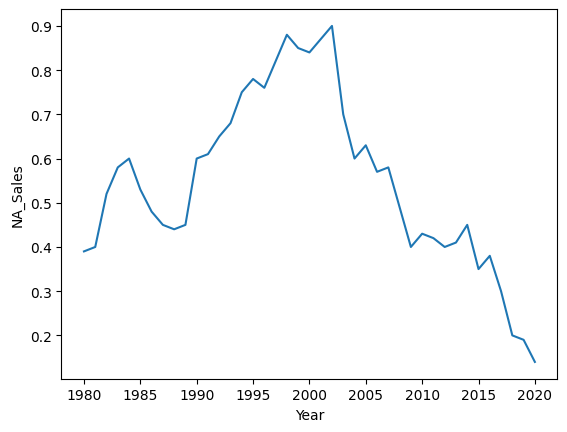

In [19]:
# Find the sales trend in North America of the same across the years.

ih = data.loc[data['Name']=='Ice Hockey']
sns.lineplot(x='Year', y='NA_Sales', data=ih)

<Axes: xlabel='Year', ylabel='NA_Sales'>

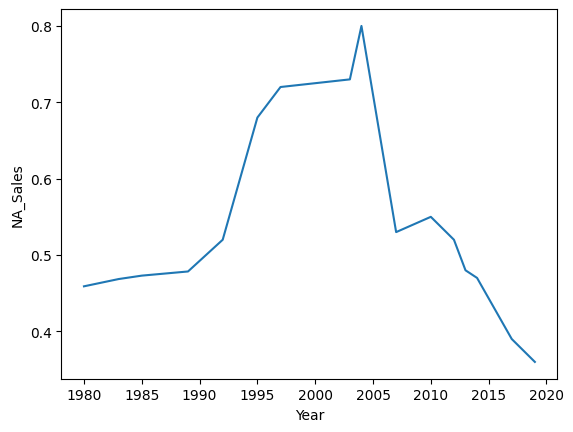

In [20]:
baseball = data.loc[data['Name']=='Baseball']
sns.lineplot(x='Year', y='NA_Sales', data=baseball)

<Axes: xlabel='Year', ylabel='NA_Sales'>

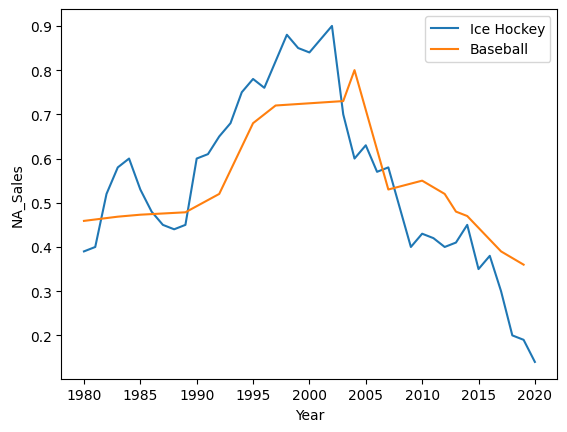

In [21]:
sns.lineplot(x='Year', y='NA_Sales', data=ih, label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, label='Baseball')

In [22]:
#univariate Analysis
# Get me the outlier from cars 24 data?

import plotly.express as px
px.box(df, y="selling_price", title="Price Outliers").show()

In [23]:
import plotly.express as px
px.scatter(df, x="age", y="selling_price", title="Price vs Age").show()

In [24]:
px.scatter(
    df,
    x="age",
    y="selling_price",
    color="fuel_type",
    title="Price vs Age segmented by Fuel Type"
).show()
